# Bike Rental Project
In this project, we will predcit the number of bikes people rent in a given hour based on a number of factors. We will use a dataset compiled by Hadi Fanaee-T at the University of Porto and hosted on the UCI Machine Learning Repository: http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

We want to use the features in the dataset to predict "cnt", the number of bikes rented in a given hour. In this project, we will implement three models and compare their mean squared errors: 
- Multivariate Linear Regressor
- Decision Tree Regressor
- Random Forest Regressor

## Data Exploration and Cleaning

In [26]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

In [2]:
# import data into pandas dataframe
bike_rentals = pd.read_csv('bike_rental_hour.csv')

# inspect first few rows of bike rentals
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Each row corresponds to a particular hour on a particular day. "cnt" represents the total count of bikes rented within that hour. "cnt" is the sum of "casual" and "registered" - since we don't want to distinguish these categories of rental for this project we can drop these columns.

In [3]:
# Drop casual and registed columns
bike_rentals = bike_rentals.drop(['casual','registered'], axis=1)

Let's examine the distribution of bike rentals and the correlation between our potential features and the target variable ("cnt").

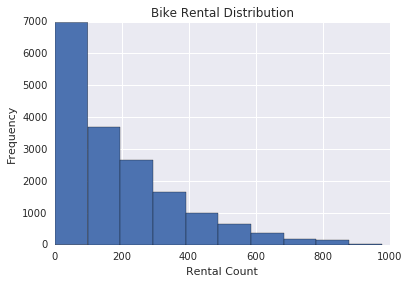

In [4]:
# visualize rental distribution
bike_rentals['cnt'].hist()
plt.title('Bike Rental Distribution')
plt.xlabel('Rental Count')
plt.ylabel('Frequency')
plt.show()

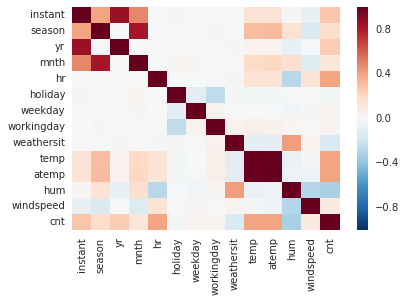

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
cnt           1.000000
Name: cnt, dtype: float64


In [5]:
# visualize heatmap of correlations between variables
corr_data = bike_rentals.corr()
sns.heatmap(corr_data)
plt.show()
print(corr_data['cnt'])

## Feature Engineering
The "hr" column of our data represents the hour the rental occured in, from 1-24. Our model will treat each hour value as distinct, but it may be more useful to group the hours by time of day.

In [6]:
# function assign_label groups a given hour by time of day:
# 1 = Morning (6-12)
# 2 = Afternoon (12-18)
# 3 = Evening (18-24)
# 4 = Night(0-6)
def assign_label(hr):
    if 6 <= hr < 12:
        return 1
    elif 12 <= hr < 18:
        return 2
    elif 18 <= hr <= 24:
        return 3
    elif 0 <= hr < 6:
        return 4

In [7]:
# apply assing_label to each item in the hr column
bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)

## Error metric
Since our target variable, "cnt", is a continuous numeric variable, we will use mean squared error as our error metric.

## Train and Test Splits
We will train our model on a random sample of 80% of the data and test on the remaining 20%.

In [8]:
# generate train set
train = bike_rentals.sample(frac=.8)

# generate test set from remaining
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

## Linear Regression Model
We will first pass our data through a multivariate linear regression model. We will pass in all the numeric features to predict "cnt".

In [11]:
# determine feature list
features = bike_rentals.columns.tolist()
features.remove('cnt')
features.remove('dteday')
features

['instant',
 'season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'time_label']

In [16]:
# instantiate linear regressor
lr = LinearRegression()

# fit on training data
lr.fit(train[features], train['cnt'])

# make predictions
predictions = lr.predict(test[features])

# compute MSE
lr_mse = mean_squared_error(test['cnt'], predictions)

# print results
print('Linear Regressor with {} features has MSE of {}'.format(len(features), lr_mse))

Linear Regressor with 14 features has MSE of 17433.770100216498


This error is quite high. Remember that MSE, since it is based on the square of error values, can be biased by features with very high error.

## Decision Tree Regressor
Consulting the correlation coefficients we computed earlier, none of the individual features has a particularly strong linear correlation with the target variable. Let's try implementing a decision-tree based approach, which will take nonlinear variables into consideration.

In [23]:
# instantiate decision tree regressor
dt = DecisionTreeRegressor(min_samples_leaf=5)

# fit regressor
dt.fit(train[features], train['cnt'])

# predict on test
predictions = dt.predict(test[features])

# compute MSE
dt_mse = mean_squared_error(test['cnt'], predictions)

# print results
print('Decision Tree Regressor with {} features has MSE of {}'.format(len(features),dt_mse))

Decision Tree Regressor with 14 features has MSE of 2748.414453896247


An initial pass shows that the MSE of our decision tree model is much lower than that of the linear regressor. 

## Random Forest Regressor
The decision tree regressor is an improvement, but it has a relatively high risk of overfitting. Let's implement a random forest regressor, whose complexity tends to yield high accuracy while limiting overfitting.

In [29]:
# instantiate random forest
rf = RandomForestRegressor(min_samples_leaf=5)

# fit to training data
rf.fit(train[features], train['cnt'])

# test
predictions = rf.predict(test[features])

# compute mse
rf_mse = mean_squared_error(test['cnt'], predictions)

# print results
print('Decision Tree Regressor with {} features has MSE of {}'.format(len(features),rf_mse))

Decision Tree Regressor with 14 features has MSE of 2235.444116131406


Removing some of the sources of overfitting yields slightly better predictive accuracy. For the problem of predicting how many bikes will be rented in a given hour, we should use the random forest regressor.